https://docs.opencv.org/4.10.0/df/dfb/group__imgproc__object.html#ga586ebfb0a7fb604b35a23d85391329be

https://docs.opencv.org/4.10.0/df/dfb/group__imgproc__object.html#ga3a7850640f1fe1f58fe91a2d7583695d

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

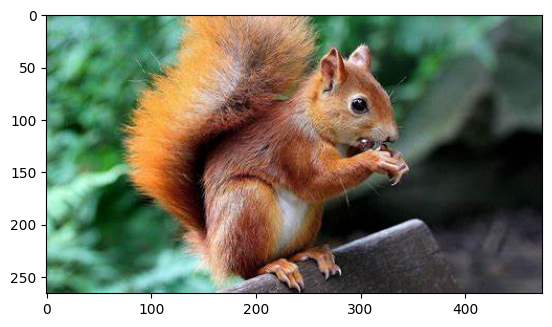

In [2]:
image = cv2.imread("../images/squirrel.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

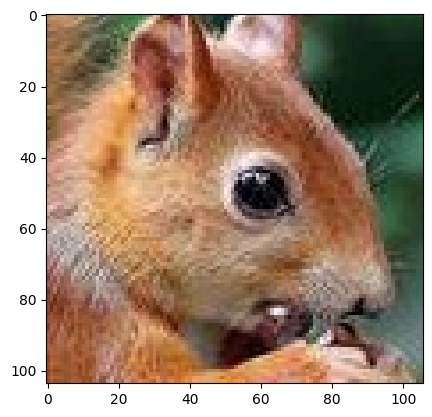

In [3]:
template = cv2.imread("../images/squirrel_template.jpg")
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
plt.imshow(template)

# matchTemplate 模板匹配

In [11]:
# TM_SQDIFF:        方差匹配方法, 越小代表越准确
# TM_SQDIFF_NORMED: 归一化的方差匹配方法, 越小代表越准确
# TM_CCORR:         相关性匹配方法, 越大代表越准确
# TM_CCORR_NORMED:  归一化的相关性匹配方法, 越大代表越准确, 对亮度变化不敏感
# TM_CCOEFF:        相关系数匹配方法, 越大代表越准确
# TM_CCOEFF_NORMED: 归一化的相关系数匹配方法, 越大代表越准确, 对亮度变化不敏感
match_method = cv2.TM_SQDIFF_NORMED
match_method

1

0.0010605156 1.0 0.524125 0.22284907
(163, 369)


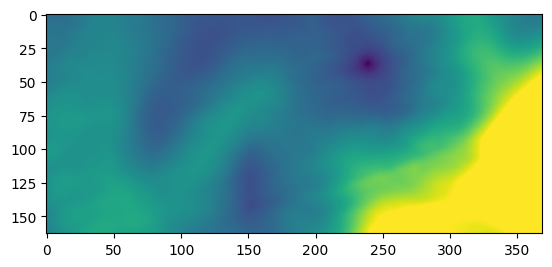

In [12]:
match_template = cv2.matchTemplate(
    image=image,        # 图片
    templ=template,     # 模板
    method=match_method,# 匹配方法
)
print(match_template.min(), match_template.max(), match_template.mean(), match_template.std())
print(match_template.shape)
plt.imshow(match_template)

In [15]:
min_value, max_value, min_loc, max_loc = cv2.minMaxLoc(src=match_template)
print(min_value, max_value)
print(min_loc, max_loc)

0.0010605156421661377 1.0
(239, 37) (368, 46)


In [16]:
# 在函数完成比较后，可以使用minMaxLoc函数将最佳匹配作为全局最小值（当使用TM_SQDIFF时）或最大值（当采用TM_CCORR或TM_CCOEFF时）。
# 在彩色图像的情况下，在所有通道上进行分子中的模板求和和和分母中的每个求和，并且对每个通道使用单独的平均值。
# 也就是说，该函数可以采用颜色模板和彩色图像。结果仍然是单通道图像，更易于分析。
if match_method == cv2.TM_SQDIFF or match_method == cv2.TM_SQDIFF_NORMED:
    temp_loc = min_loc
else:
    temp_loc = max_loc
# [x, y]
temp_loc

(239, 37)

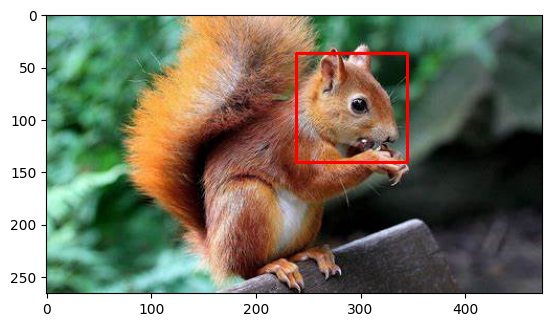

In [17]:
res = cv2.rectangle(
    img=image.copy(),
    pt1=(temp_loc[0], temp_loc[1]),
    pt2=(temp_loc[0] + template.shape[1], temp_loc[1] + template.shape[0]),
    color=(255, 0, 0),
    thickness=2
)

plt.imshow(res)